In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"E:\Data Analysis\Weather_Project_Prajakta\Data\weather_data.csv.csv")
print(df)

#Showing df.head(), df.info(), df.describe()
df.head()
df.info()
df.describe()

          Date  Temperature  Humidity  WindSpeed  Rainfall
0   01-01-2024         29.5        74       17.3       5.0
1   02-01-2024         27.6        55       13.3       3.5
2   03-01-2024         29.9        72       12.9       0.0
3   04-01-2024         32.6        69        8.6       0.0
4   05-01-2024         27.3        83        6.4       0.0
..         ...          ...       ...        ...       ...
85  26-03-2024         26.5        74       17.2       0.0
86  27-03-2024         30.7        86       18.0       0.5
87  28-03-2024         29.0        79       18.7       0.0
88  29-03-2024         26.4        51       12.7       7.2
89  30-03-2024         29.5        60       12.5       7.2

[90 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         90 non-null     object 
 1   Temperature  90 non-null     float64

,Temperature,Humidity,WindSpeed,Rainfall
count,90.000000,90.000000,90.000000,90.000000
mean,27.701111,66.433333,13.282222,2.377778
std,2.806433,13.270776,4.371578,2.703630
min,20.100000,45.000000,5.100000,0.000000
25%,26.200000,55.000000,9.500000,0.000000
50%,27.650000,68.000000,13.900000,0.500000
75%,29.500000,77.000000,17.175000,5.000000
max,33.600000,88.000000,19.900000,7.200000


In [6]:
#Check missing values: df.isnull().sum() and duplicates
print(df.isnull())
print(df.isnull().sum())
print(df.duplicated())

     Date  Temperature  Humidity  WindSpeed  Rainfall
0   False        False     False      False     False
1   False        False     False      False     False
2   False        False     False      False     False
3   False        False     False      False     False
4   False        False     False      False     False
..    ...          ...       ...        ...       ...
85  False        False     False      False     False
86  False        False     False      False     False
87  False        False     False      False     False
88  False        False     False      False     False
89  False        False     False      False     False

[90 rows x 5 columns]
Date           0
Temperature    0
Humidity       0
WindSpeed      0
Rainfall       0
dtype: int64
0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool


In [7]:
#Data Cleaning
#convert date to datetime
df["Date"] = pd.to_datetime(df["Date"],format="%d-%m-%Y")
print(df)

#no missing values 

#removes duplicates
df.duplicated("Rainfall")
df.drop_duplicates(inplace=True)
print(df)

#saving 
os.makedirs("output", exist_ok=True)
df.to_csv("output/weather_data_clean.csv", index=False)
print("Saved")

         Date  Temperature  Humidity  WindSpeed  Rainfall
0  2024-01-01         29.5        74       17.3       5.0
1  2024-01-02         27.6        55       13.3       3.5
2  2024-01-03         29.9        72       12.9       0.0
3  2024-01-04         32.6        69        8.6       0.0
4  2024-01-05         27.3        83        6.4       0.0
..        ...          ...       ...        ...       ...
85 2024-03-26         26.5        74       17.2       0.0
86 2024-03-27         30.7        86       18.0       0.5
87 2024-03-28         29.0        79       18.7       0.0
88 2024-03-29         26.4        51       12.7       7.2
89 2024-03-30         29.5        60       12.5       7.2

[90 rows x 5 columns]
         Date  Temperature  Humidity  WindSpeed  Rainfall
0  2024-01-01         29.5        74       17.3       5.0
1  2024-01-02         27.6        55       13.3       3.5
2  2024-01-03         29.9        72       12.9       0.0
3  2024-01-04         32.6        69        8.6  

In [8]:
#Basic Exploratory Data Analysis

#Statistics like mean,median,min,max
stats=df[["Temperature","Humidity","WindSpeed","Rainfall"]].agg(["mean", "median","min","max"])
print("Mean,Median,Min,Max of each column\n",stats)

#finding hottest and collest day
hottest=df.loc[df["Temperature"].idxmax()]
coldeset=df.loc[df["Temperature"].idxmin()]
print("Hottest day is:",hottest)
print("Coldest day is:",coldeset)

#Group by month and compute monthly averages
df.set_index("Date").resample("M").mean()

Mean,Median,Min,Max of each column
         Temperature   Humidity  WindSpeed  Rainfall
mean      27.701111  66.433333  13.282222  2.377778
median    27.650000  68.000000  13.900000  0.500000
min       20.100000  45.000000   5.100000  0.000000
max       33.600000  88.000000  19.900000  7.200000
Hottest day is: Date           2024-02-01 00:00:00
Temperature                   33.6
Humidity                        61
WindSpeed                     16.2
Rainfall                       0.5
Name: 31, dtype: object
Coldest day is: Date           2024-03-15 00:00:00
Temperature                   20.1
Humidity                        77
WindSpeed                     14.2
Rainfall                       5.0
Name: 74, dtype: object


,Temperature,Humidity,WindSpeed,Rainfall
Date,,,,
2024-01-31,27.390323,68.419355,12.441935,2.325806
2024-02-29,27.686207,63.517241,13.206897,2.817241
2024-03-31,28.036667,67.200000,14.223333,2.006667


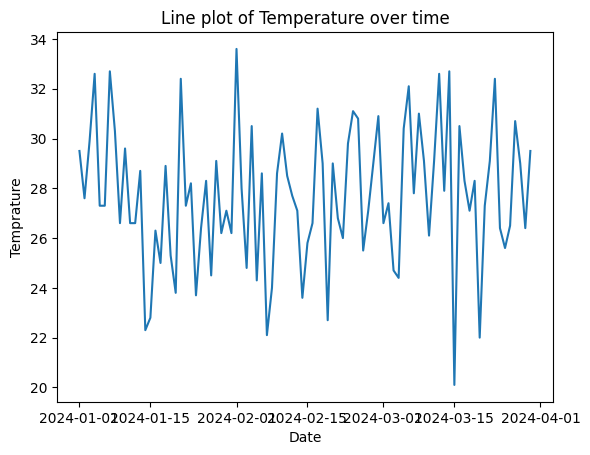

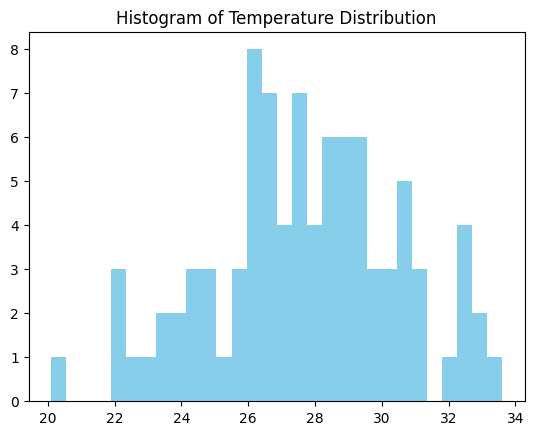

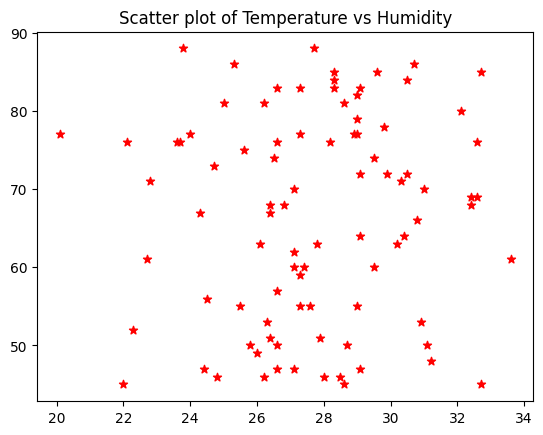

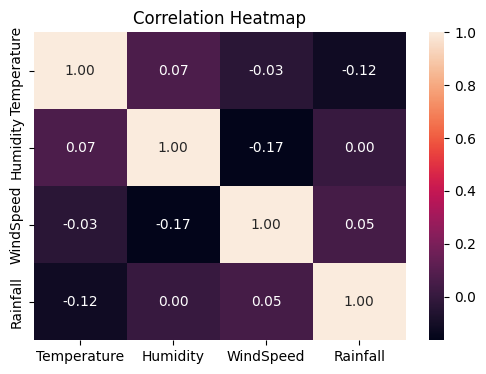

In [25]:
#Visualization
#Line plot of Temperature over Date
plt.plot(df["Date"],df["Temperature"])
plt.title("Line plot of Temperature over time")
plt.xlabel("Date")
plt.ylabel("Temprature")
plt.show()

#Histogram
plt.hist(df.Temperature,bins=30,color='skyblue')
plt.title("Histogram of Temperature Distribution")
plt.show()

#Scatter plot — Temperature vs Humidity
plt.scatter(df.Temperature,df.Humidity,color="red",marker="*")
plt.title("Scatter plot of Temperature vs Humidity")
plt.show()

#Correletion Heatmap 
os.makedirs("plots", exist_ok=True)
plt.figure(figsize=(6,4)) 
sns.heatmap(df[["Temperature","Humidity","WindSpeed","Rainfall"]].corr(),annot=True, fmt=".2f") 
plt.title("Correlation Heatmap") 
plt.savefig("plots/corr_heatmap.png",bbox_inches="tight") 
plt.show()

In [22]:
plt.savefig("plots/corr_heatmap.png",bbox_inches="tight") 

FileNotFoundError: [Errno 2] No such file or directory: 'plots/corr_heatmap.png'

<Figure size 640x480 with 0 Axes>